In [2]:
using StaticArrays, PyPlot, LsqFit, Colors

In [27]:
import Meron

In [44]:
reload("Meron")

In [6]:
β = 1.0
lado = 10

10

#### Single-cluster classic

In [7]:
bongo = Meron.rand_spins(lado,lado);

In [8]:
@time Q, Qc, χ , χ_err = Meron.evol_single_standard!(bongo, 10000, 1.0);
χ , χ_err 

  0.532010 seconds (575.16 k allocations: 33.035 MiB, 2.78% gc time)


(0.016872312768723127, 0.02614437303735575)

#### Multi-cluster classic

In [48]:
bongo = [SVector(1.0,0.0,0.0) for i in 1:lado, j in 1:lado]
Meron.verificentro(bongo, 2π/3)

Se cumple la condición.


In [35]:
director = Meron.rand_spin()
volteado = copy(bongo)
grupos = Meron.multicluster_standard!(bongo, volteado, director, β)
length(grupos)

11

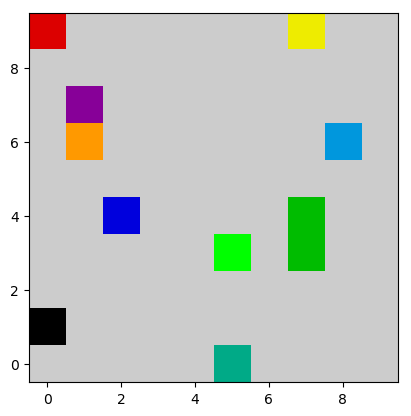

  0.013606 seconds (141 allocations: 6.203 KiB)


In [36]:
@time Meron.coloreando_clusters(grupos, lado, lado);

In [37]:
lista_cargas, original = Meron.cargas(bongo, volteado, grupos);
PyPlot.plt[:hist](lista_cargas, 10, align = "left");

LoadError: [91mUndefVarError: cargas not defined[39m

In [58]:
Meron.coloreando_merones(grupos, lista_cargas, lado,lado)

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd67563d278>

In [47]:
@time χ , χ_err = Meron.evol_multi_standard!(bongo, 1000, 1.0) # pasos y β
χ , χ_err 

  0.437279 seconds (203.45 k allocations: 16.015 MiB, 2.24% gc time)


(0.01733, 0.08319033376319407)

**Por alguna razón evol! sólo grafica bien con un paso** (matshow se murió e imshow tiene este problema)

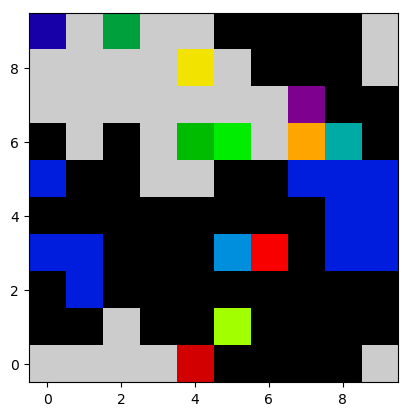

In [43]:
Meron.evol_multi_standard!(bongo, 1, 10.; graficos = "cluster")

In [49]:
Meron.evol_multi_standard!(bongo, 1, 1.; graficos = "meron")

#### Multi-cluster constrained

In [1]:
import Meron

In [96]:
reload("Meron")

In [66]:
L = 30
snoop = [SVector(1.0,0.0,0.0) for i in 1:L, j in 1:L];
delta = 0.55π

1.7278759594743864

In [67]:
@time χ , χ_err = Meron.evol_multi_constrained!(snoop, 100, delta);
χ, χ_err

  3.144361 seconds (248.43 k allocations: 17.756 MiB)


(0.0016222222222222222, 0.23716337121584488)

#### Single-cluster constrained

In [68]:
@time Q, Qc, χ , χ_err = Meron.evol_single_constrained!(snoop, 1000, delta);
χ, χ_err

  0.247712 seconds (200.75 k allocations: 11.620 MiB, 4.94% gc time)


(0.0026917526917526915, 0.11600341786901126)

### Carga-tamaño

In [122]:
L = 50
σ = [SVector(1.0,0.0,0.0) for i in 1:L, j in 1:L];
@time llavero = Meron.carga_tamaño!(σ, 1000, 2π/3)

359.100153 seconds (8.61 M allocations: 513.369 MiB, 0.05% gc time)


Dict{Float64,Tuple{Float64,Float64,Float64}} with 9 entries:
  0.0  => (0.876468, 1.33615, 0.00165551)
  0.5  => (0.0594928, 3.05553, 0.00927509)
  2.0  => (3.13394e-6, 16.8, 5.5263)
  -1.0 => (0.00211415, 6.85206, 0.0871773)
  1.5  => (8.90038e-5, 14.2676, 0.602654)
  -2.0 => (3.13394e-6, 16.4, 3.31059)
  -1.5 => (9.40181e-5, 13.3533, 0.571676)
  -0.5 => (0.0595103, 3.04839, 0.00922454)
  1.0  => (0.00222509, 6.99662, 0.0897096)

In [123]:
Meron.historiador(llavero; graficar = "probabilidad")
Meron.PyPlot.savefig("hist", dpi=1000)

In [124]:
Meron.historiador(llavero; graficar = "tamaños")
Meron.PyPlot.savefig("size", dpi=1000)

### Distancia entre anti-meron y meron.

In [119]:
reload("Meron")

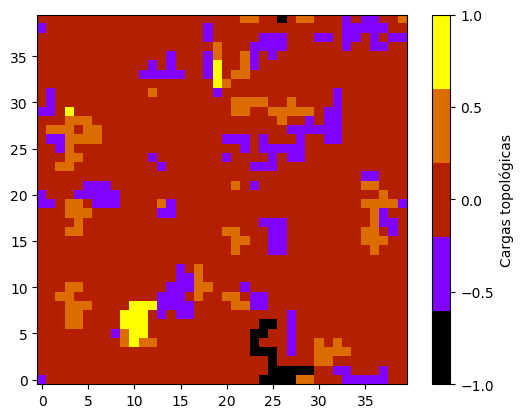

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd66e168cc0>

In [120]:
R = 40
C = 40
pasos = 10
σ = [SVector(1.0,0.0,0.0) for i in 1:R, j in 1:C]
Σ = copy(σ)
llavero = Meron.carga_tamaño!(σ, pasos, 2π/3);
clusters = Meron.multicluster_constrained!(σ, Σ, Meron.rand_spin(), 2π/3);
carguitas, original = Meron.cargas(σ, Σ, clusters)
Meron.coloreando_merones(clusters, carguitas, R, C)

## Tomar la configuración de parejas cuya suma de distancias sea menor.

In [126]:
tam = 3
bombo = [rand(1:20.) for i in 1:tam, j in 1:tam+4]

3×7 Array{Float64,2}:
  4.0  10.0  18.0  15.0   1.0  14.0   9.0
 14.0  15.0  17.0  12.0  15.0   8.0  18.0
 20.0   2.0   7.0  18.0  14.0  16.0  13.0

In [127]:
@time ini = Float64[bombo[i,i] for i in 1:size(bombo,1)]

  0.004077 seconds (21 allocations: 960 bytes)


3-element Array{Float64,1}:
  4.0
 15.0
  7.0

In [128]:
dist_min = sum(ini)

26.0

In [129]:
function busca_apareamiento_minimo_show!{T<:Float64}(la_buena::Vector{T}, la_prueba::Vector{T}, 
                                                        matriz::Matrix{T}, disponibles::Vector{T},
                                                            renglones::Int64, columnas::Int64, 
                                                                contador::Array{Int64,1}, nivel::Int64 = 1) 
    if nivel < renglones   
        for c in 1:columnas
            if disponibles[c] == 0.0; continue; end
            la_prueba[nivel] = matriz[nivel, c]
            disponibles_copia = copy(disponibles)  #Quizá esto no sea necesario.
            disponibles_copia[c] = 0.0
            busca_apareamiento_minimo_show!(la_buena, la_prueba, matriz, disponibles_copia,
                                                renglones, columnas, contador, nivel+1)
        end
    else
        for c in 1:columnas
            if disponibles[c] == 0.0; continue; end
            la_prueba[nivel] = matriz[nivel, c]
            #@show sum(la_prueba)
            push!(contador, sum(la_prueba))
            if sum(la_prueba) < sum(la_buena)
                #la_buena = copy(la_prueba)  #Por alguna razón esto no funciona.
                for i in 1:renglones
                    la_buena[i] = la_prueba[i]
                end
            end
        end
    end
end

busca_apareamiento_minimo_show! (generic function with 2 methods)

In [130]:
registro = Int64[]

0-element Array{Int64,1}

In [134]:
@time busca_apareamiento_minimo_show!(ini, copy(ini), bombo, collect(1.0:1.0*size(bombo,2)), 
                                        size(bombo,1), size(bombo,2), registro)

  0.000017 seconds (58 allocations: 7.406 KB)


In [135]:
ini

3-element Array{Float64,1}:
 1.0
 8.0
 2.0

In [136]:
sum(ini)

11.0

In [137]:
registro;

In [138]:
facto(A,B) = factorial(B)/factorial(B-A)
length(registro), facto(size(bombo)...)

(840,210.0)

In [139]:
#stirling(n) = sqrt(2π*n)*(n/e)^n

In [186]:
using PyPlot #Plots
function cronometro(M)
    tiempos = zeros(M)
    lados = collect(1:M)
    for N in lados
        bombo = [rand(1.:N) for i in 1:N, j in 1:N]
        ini = Float64[bombo[i,i] for i in 1:N]
        t = @elapsed Meron.busca_apareamiento_minimo_ma!(ini, copy(ini), bombo, collect(1.0:N), N, N, 1)
        tiempos[N] = t
    end
    #Plots.plot(lados, tiempos, title = "Tiempo exponencial", xlabel = "Parejas", ylabel = "Tiempo", yaxis = :log)
    plot(lados,tiempos, label = "Computo")
    plot(lados, map(factorial, lados), label = "Factorial")
    #plot(lados, map(stirling, lados), label = "Stirling")
    title("Crecimiento del tiempo de cómputo")
    xlabel("Parejas")
    ylabel("Tiempo")
    yscale("log")
    legend(bbox_to_anchor=(0, 1), loc="upper left")
    grid(true)
end

cronometro (generic function with 1 method)

In [188]:
# @time cronometro(12)

## Calculando promedios

In [142]:
R = 15
C = 15
pasos = 10
σ = [SVector(1.0,0.0,0.0) for i in 1:R, j in 1:C]
Σ = copy(σ)
llavero = Meron.carga_tamaño!(σ, pasos, 2π/3);
clusters= Meron.multicluster_constrained!(σ, Σ, Meron.rand_spin(), 2π/3);
carguitas, original = Meron.cargas(σ, Σ, clusters)
Meron.coloreando_merones(clusters, carguitas, R, C)

PyObject <matplotlib.colorbar.Colorbar object at 0x7fd66d695160>

In [143]:
Qmin, Qmax = extrema(carguitas)
Qmax = min(abs(Qmin),abs(Qmax))
if Qmax == 0.0; println("Configuración sin parejas."); end

In [172]:
Q_dist = Dict{Float64, Vector{Float64}}()
@time Meron.distancias_minimas_absolutas_ma!(Q_dist, clusters, carguitas, Qmax, R, C)
Q_dist

  0.004480 seconds (18.75 k allocations: 2.860 MB)


Dict{Float64,Array{Float64,1}} with 1 entry:
  0.5 => [1.41421,1.41421,1.41421,3.60555,2.23607,1.0]

In [158]:
L = 8
σ = [SVector(1.0,0.0,0.0) for i in 1:L, j in 1:L]
Σ = copy(σ)
Meron.evol_multi_constrained!(σ, 50, 2π/3)
@time llavero = Meron.distancia_absoluta_ma!(σ, 8, 2π/3)

  0.001775 seconds (1.09 k allocations: 122.406 KB)


Dict{Float64,Tuple{Float64,Float64,Float64}} with 1 entry:
  0.5 => (15.0,1.31002,0.124552)

In [159]:
L = 15
σ = [SVector(1.0,0.0,0.0) for i in 1:L, j in 1:L];
Meron.evol_multi_constrained!(σ, 50, 2π/3)
@time llavero = Meron.distancia_absoluta_ma!(σ, 8, 2π/3)

  0.062429 seconds (309.92 k allocations: 47.161 MB, 11.34% gc time)


Dict{Float64,Tuple{Float64,Float64,Float64}} with 1 entry:
  0.5 => (38.0,1.68436,0.160438)

### Considerar todos los posibles apareamientos tarda mucho.

### Simulated Annealing

Se manejarán arreglos cuyo índice corresponderá al renglón de la matriz de distancias y el valor de esa entrada a la columna de la matriz de distancias.

In [176]:
inicial = collect(1:size(bombo,1))
temperaturas = collect(linspace(10.0,0.0, 10))
@time Meron.annealing_ma!(inicial, bombo, temperaturas, length(bombo))

  0.000123 seconds (4 allocations: 160 bytes)


In [177]:
inicial

7-element Array{Int64,1}:
  5
  3
  6
  8
  7
  1
 10

In [178]:
final = Meron.traductor(inicial, bombo)

7-element Array{Float64,1}:
 3.0
 3.0
 5.0
 2.0
 3.0
 3.0
 1.0

In [179]:
ini

3-element Array{Float64,1}:
 1.0
 8.0
 2.0

In [180]:
(sum(ini), sum(final), Meron.sumador(inicial, bombo))

(11.0,20.0,20.0)

In [181]:
tam = 7
bombo = [rand(1:20.) for i in 1:tam, j in 1:tam+4]

7×11 Array{Float64,2}:
  5.0   6.0   2.0  19.0   6.0  14.0  14.0   5.0   1.0  16.0   9.0
 18.0   3.0   3.0  11.0  18.0   4.0   7.0  16.0  18.0   6.0   4.0
 13.0  11.0   4.0   9.0  11.0   6.0   5.0  12.0   1.0   1.0  16.0
 16.0  16.0  11.0  18.0   1.0  10.0  20.0  16.0  16.0  15.0  13.0
 13.0  16.0  20.0  18.0  18.0  17.0  18.0  11.0  16.0  20.0   8.0
 20.0  15.0  19.0  20.0  11.0  20.0  10.0  16.0   9.0  12.0   4.0
 14.0   6.0   5.0   5.0   3.0   4.0  19.0  13.0  10.0   7.0   3.0

In [182]:
absoluto = Float64[bombo[i,i] for i in 1:size(bombo,1)]
registro = Int64[]
@time Meron.busca_apareamiento_minimo_ma!(absoluto, copy(absoluto), bombo, collect(1.0:1.0*size(bombo,2)), 
                                        size(bombo,1), size(bombo,2))
anneal = collect(1:size(bombo,1))
temperaturas = collect(linspace(10.0,0.0, 10))
@time Meron.annealing_ma!(anneal, bombo, temperaturas, 10length(bombo))
@show sum(absoluto)
@show Meron.sumador(anneal, bombo)

  0.094501 seconds (397.12 k allocations: 66.654 MB, 11.81% gc time)
  0.000899 seconds (5 allocations: 176 bytes)
sum(absoluto) = 25.0
Meron.sumador(anneal,bombo) = 28.0


28.0

In [183]:
using PyPlot #Plots

function cronometros(M, T, nT)
    
    tiempos_recu = zeros(M-1)
    tiempos_anneal = zeros(M-1)
    
    lados = collect(2:M)
    temperaturas = collect(linspace(1.0*T,0.0, nT))
    
    for N in lados
        bombo = [rand(1.0:N) for i in 1:N, j in 1:N]
        ini = Float64[bombo[i,i] for i in 1:N]
        anneal = collect(1:size(bombo,1))
        
        t_r = @elapsed Meron.busca_apareamiento_minimo_ma!(ini, copy(ini), bombo, collect(1.0:N), N, N, 1)
        t_a = @elapsed Meron.annealing_ma!(anneal, bombo, temperaturas, 10length(bombo))
        
        tiempos_recu[N-1] = t_r
        tiempos_anneal[N-1] = t_a
    end
    plot(lados, tiempos_recu, label = "Recursivo")
    plot(lados, tiempos_anneal, label = "Simulated Annealing")
    title("Crecimiento del tiempo de cómputo")
    xlabel("Parejas")
    ylabel("Tiempo")
    yscale("log")
    legend(bbox_to_anchor=(0, 1), loc="upper left")
    grid(true)
end

cronometros (generic function with 1 method)

In [46]:
#@time cronometros(13, 10, 100)  ### Media hora

1483.491286 seconds (11.60 G allocations: 1.843 TB, 17.58% gc time)


In [3]:
using PyPlot 
function coincidencias(parejas, T, nT, factor, repeticiones, nombre::ASCIIString)
    
    coincidencias = zeros(parejas-1)
    errores = zeros(parejas-1)
    
    lados = collect(2:parejas)
    temperaturas = collect(linspace(1.0*T,0.0, nT))
    
    for N in lados
        bombo = [rand(1.0:N) for i in 1:N, j in 1:N]
        recu = Float64[bombo[i,i] for i in 1:N]
        
        Meron.busca_apareamiento_minimo_ma!(recu, copy(recu), bombo, collect(1.0:N), N, N)
        dist_min_abs = sum(recu)
        
        registro = zeros(repeticiones)
        for i in 1:repeticiones
            anneal = collect(1:size(bombo,1))
            Meron.annealing_ma!(anneal, bombo, temperaturas, factor*length(bombo))
            dist_min_ann = sumador(anneal, bombo)

            if dist_min_ann == dist_min_abs
                registro[i] = 1.0
            end
        end
        coincidencias[N-1] = mean(registro)
        errores[N-1] = std(registro)/sqrt(repeticiones)
    end
    errorbar(lados, coincidencias, yerr = errores, label = nombre)
    title("Coincidencias")
    xlabel("Parejas")
    ylabel("Porcentaje de Coincidencias")
    #yscale("log")
    legend(loc="center left", bbox_to_anchor=(1, 0.5))
    grid(true)
    xlim(1, parejas+1)
end

coincidencias (generic function with 1 method)

106.468615 seconds (900.21 M allocations: 133.820 GB, 17.96% gc time)
116.097967 seconds (906.70 M allocations: 133.916 GB, 17.03% gc time)
126.996763 seconds (913.19 M allocations: 134.013 GB, 16.47% gc time)
116.834722 seconds (919.68 M allocations: 134.110 GB, 16.79% gc time)
124.752613 seconds (926.17 M allocations: 134.206 GB, 16.42% gc time)
132.187991 seconds (932.66 M allocations: 134.303 GB, 16.36% gc time)


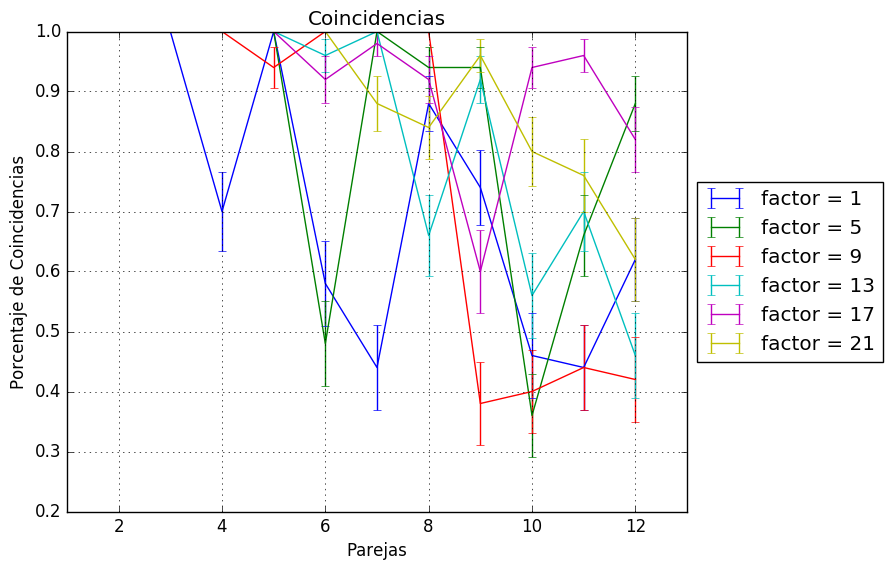

In [10]:
parejas = 12
Tmax = 10
nT = 50
factor = 10
repeticiones = 50
for factor in 1:4:21
    @time coincidencias(parejas, Tmax, nT, factor, repeticiones, "factor = $factor")
end

121.398161 seconds (901.83 M allocations: 133.844 GB, 17.83% gc time)
121.366167 seconds (905.08 M allocations: 133.892 GB, 17.66% gc time)
128.967199 seconds (908.32 M allocations: 133.940 GB, 17.46% gc time)
139.035456 seconds (911.57 M allocations: 133.989 GB, 17.12% gc time)
138.749354 seconds (914.81 M allocations: 134.037 GB, 16.94% gc time)
133.066883 seconds (918.06 M allocations: 134.085 GB, 16.80% gc time)
127.447250 seconds (921.30 M allocations: 134.134 GB, 17.09% gc time)
136.363028 seconds (924.55 M allocations: 134.182 GB, 16.91% gc time)
138.304621 seconds (927.79 M allocations: 134.231 GB, 16.82% gc time)
142.729937 seconds (931.04 M allocations: 134.279 GB, 16.40% gc time)


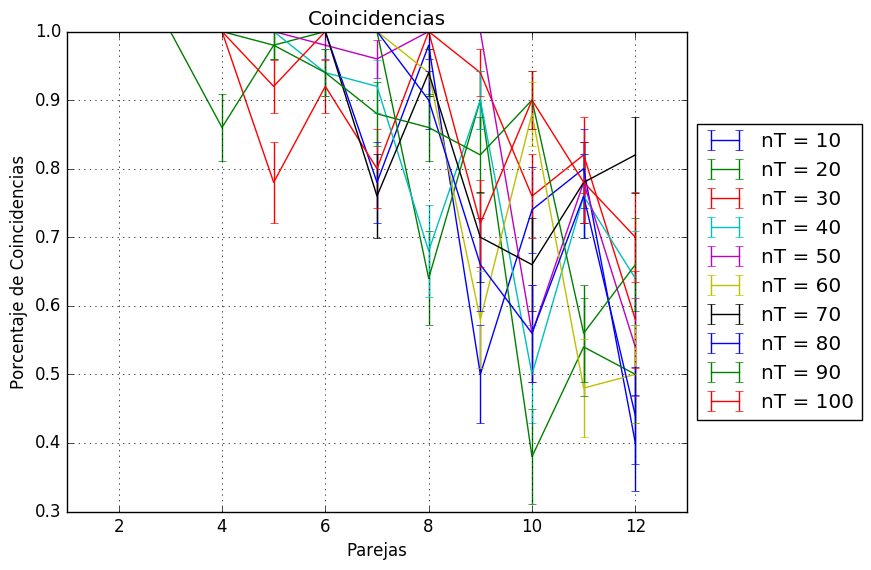

In [11]:
parejas = 12
Tmax = 10
#nT = 50
factor = 10
repeticiones = 50
for nT in 10:10:100
    @time coincidencias(parejas, Tmax, nT, factor, repeticiones, "nT = $nT")
end

127.761212 seconds (914.81 M allocations: 134.037 GB, 18.54% gc time)
123.225657 seconds (914.81 M allocations: 134.037 GB, 18.70% gc time)
135.193691 seconds (914.81 M allocations: 134.037 GB, 18.18% gc time)
140.869681 seconds (914.81 M allocations: 134.037 GB, 18.33% gc time)
142.242586 seconds (914.81 M allocations: 134.037 GB, 18.38% gc time)
145.148106 seconds (914.81 M allocations: 134.037 GB, 18.37% gc time)
134.497768 seconds (914.81 M allocations: 134.037 GB, 18.23% gc time)
141.770340 seconds (914.81 M allocations: 134.037 GB, 18.03% gc time)


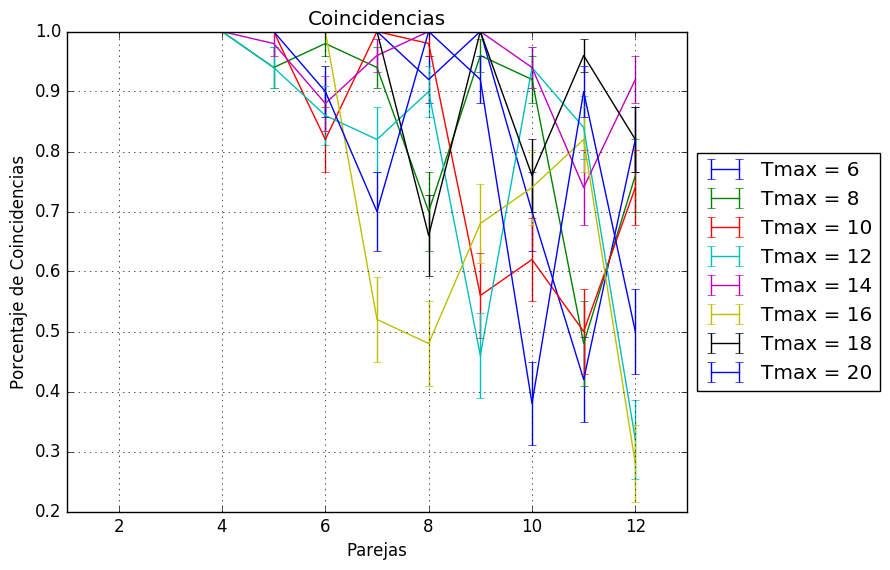

In [12]:
parejas = 12
#Tmax = 10
nT = 50
factor = 10
repeticiones = 50
for Tmax in 6:2:20
    @time coincidencias(parejas, Tmax, nT, factor, repeticiones, "Tmax = $Tmax")
end

In [205]:
L = 13
σ = [SVector(1.0,0.0,0.0) for i in 1:L, j in 1:L];
@time Meron.evol_multi_constrained!(σ, 50, 2π/3)
@time llavero = Meron.distancia_annealing_ma!(σ, 8, 2π/3)

  0.102572 seconds (15.91 k allocations: 1.792 MB)
 15.351950 seconds (105.36 M allocations: 17.259 GB, 9.94% gc time)


Dict{Float64,Tuple{Float64,Float64,Float64}} with 1 entry:
  0.5 => (38.0,1.80966,0.142509)

### Midiendo la distancia entre entes con la misma carga.

In [206]:
function bifactorial(n::Int64)
    if n < 4
        return n
    else
        n*bifactorial(n-2)
    end
end

bifactorial (generic function with 1 method)

In [207]:
function combinaciones!(apareamientos::Vector{Vector{Int64}}, parejas::Vector{Int64}, 
                            disponibles::Vector{Int64}, faltantes::Int64)
    if faltantes < 2
        push!(apareamientos, parejas)
        
    elseif faltantes % 2 != 0
        
        for k in 1:faltantes
            pares = copy(disponibles)
            deleteat!(pares, k)
            combinaciones!(apareamientos, parejas, pares, faltantes-1)
        end 
    else
        for k in 2:faltantes
            i = disponibles[1]
            j = disponibles[k]

            disp = copy(disponibles)
            pare = copy(parejas)

            push!(pare, i, j)
            deleteat!(disp, k)
            deleteat!(disp, 1)
            combinaciones!(apareamientos, pare, disp, faltantes-2)
        end
    end
end

combinaciones! (generic function with 1 method)

In [208]:
bifactorial(6)

48

In [209]:
apa = Vector{Int64}[]
par = Int64[]
tam = 5
indices = collect(1:tam)
falt = length(indices)
@time combinaciones!(apa, par, indices, falt)
if tam % 2 == 0
    @show teo = bifactorial(tam-1)
else
    @show teo = bifactorial(tam)
end
@show enc = length(apa)
@show teo == enc
apa 

  0.021852 seconds (6.19 k allocations: 281.122 KB)
teo = bifactorial(tam) = 15
enc = length(apa) = 15
teo == enc = true


15-element Array{Array{Int64,1},1}:
 [2,3,4,5]
 [2,4,3,5]
 [2,5,3,4]
 [1,3,4,5]
 [1,4,3,5]
 [1,5,3,4]
 [1,2,4,5]
 [1,4,2,5]
 [1,5,2,4]
 [1,2,3,5]
 [1,3,2,5]
 [1,5,2,3]
 [1,2,3,4]
 [1,3,2,4]
 [1,4,2,3]

In [210]:
function medidor_total(matriz, apareamiento)
    suma = 0.0
    for i in 2:2:length(apareamiento)
        suma += matriz[apareamiento[i-1],apareamiento[i]]
    end
    return suma
end

medidor_total (generic function with 1 method)

In [211]:
tam = 5
mat = rand(tam, tam)
for i in 1:size(mat, 1)
    for j in 1:i
        mat[i,j] = 0.0
    end
end
mat

5×5 Array{Float64,2}:
 0.0  0.65573  0.994195  0.161951  0.172792  
 0.0  0.0      0.339646  0.281509  0.917569  
 0.0  0.0      0.0       0.21242   0.00371594
 0.0  0.0      0.0       0.0       0.173487  
 0.0  0.0      0.0       0.0       0.0       

In [212]:
medidor_total(mat, [1,3,2,4])

1.275704112734856

In [213]:
mat[1,3] + mat[2,4]

1.275704112734856

In [214]:
buscador(x) = medidor_total(mat, x)
apar = copy(apa)
res = zeros(length(apar))
#res = map(buscador, apar)
for i in eachindex(apar)
    res[i] = medidor_total(mat, apar[i])
end
res

15-element Array{Float64,1}:
 0.513133
 0.285225
 1.12999 
 1.16768 
 0.165667
 0.385211
 0.829218
 1.07952 
 0.454301
 0.659446
 1.91176 
 0.512437
 0.86815 
 1.2757  
 0.501597

In [215]:
minimum(res)

0.16566726597815196

In [216]:
using PyPlot #Plots
function cronometro(M)
    tiempos = zeros(M)
    lados = collect(1:M)
    for N in lados
        rango = 1:N
        #bombo = [rand(1.:N) for i in 1:N, j in 1:N]
        tiempos[N] = @elapsed combinaciones!(Vector{Int64}[], Int64[], collect(rango), N)
    end
    #Plots.plot(lados, tiempos, title = "Tiempo exponencial", xlabel = "Parejas", ylabel = "Tiempo", yaxis = :log)
    plot(lados,tiempos, label = "Computo")
    plot(lados, map(bifactorial, lados)/10^6, label = "Bifactorial")
    #plot(lados, map(factorial, lados), label = "Factorial")
    #plot(lados, map(stirling, lados), label = "Stirling")
    title("Crecimiento del tiempo de cómputo")
    xlabel("Parejas")
    ylabel("Tiempo")
    yscale("log")
    legend(bbox_to_anchor=(0, 1), loc="upper left")
    grid(true)
end

cronometro (generic function with 1 method)

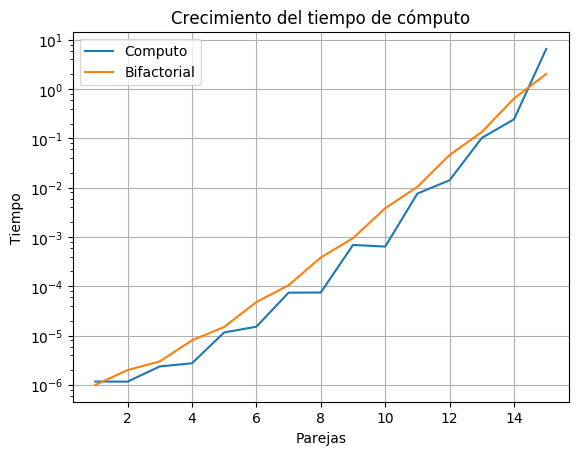

  6.949124 seconds (16.78 M allocations: 2.373 GB, 72.07% gc time)


In [218]:
@time cronometro(15)

In [221]:
function busca_apareamiento_minimo!{T<:Int64}(apareo_minimo::Vector{T}, apareo::Vector{T}, matriz::Matrix{Float64},
                                                disponibles::Vector{T}, faltantes::T)
    if faltantes < 2
        @show apareo_minimo
        @show apareo
        @show temporal = medidor_total(matriz, apareo_minimo)
        @show propuesta = medidor_total(matriz, apareo)
        if propuesta < temporal
            for i in eachindex(apareo_minimo)
                apareo_minimo[i] = apareo[i]
            end
        end
        
    elseif faltantes % 2 != 0
        
        for k in 1:faltantes
            disp = copy(disponibles)
            deleteat!(disp, k)
            busca_apareamiento_minimo!(apareo_minimo, apareo, matriz, disp, faltantes-1)
        end 
    else
        for k in 2:faltantes
            i = disponibles[1]
            j = disponibles[k]

            disp = copy(disponibles)
            apa = copy(apareo)

            push!(apa, i, j)
            deleteat!(disp, k)
            deleteat!(disp, 1)
            busca_apareamiento_minimo!(apareo_minimo, apa, matriz, disp, faltantes-2)
        end
    end
end

busca_apareamiento_minimo! (generic function with 1 method)

In [222]:
tam = 5
apa = collect(1:tam-1)
apa_copy = Int64[]
indices = collect(1:tam)
falt = length(indices)
busca_apareamiento_minimo!(apa, apa_copy, mat, indices, tam)
apa

apareo_minimo = [1,2,3,4]
apareo = [2,3,4,5]
temporal = medidor_total(matriz,apareo_minimo) = 0.868150171523447
propuesta = medidor_total(matriz,apareo) = 0.5131332196242824
apareo_minimo = [2,3,4,5]
apareo = [2,4,3,5]
temporal = medidor_total(matriz,apareo_minimo) = 0.5131332196242824
propuesta = medidor_total(matriz,apareo) = 0.28522534544810796
apareo_minimo = [2,4,3,5]
apareo = [2,5,3,4]
temporal = medidor_total(matriz,apareo_minimo) = 0.28522534544810796
propuesta = medidor_total(matriz,apareo) = 1.1299886848824974
apareo_minimo = [2,4,3,5]
apareo = [1,3,4,5]
temporal = medidor_total(matriz,apareo_minimo) = 0.28522534544810796
propuesta = medidor_total(matriz,apareo) = 1.1676820046010696
apareo_minimo = [2,4,3,5]
apareo = [1,4,3,5]
temporal = medidor_total(matriz,apareo_minimo) = 0.28522534544810796
propuesta = medidor_total(matriz,apareo) = 0.16566726597815196
apareo_minimo = [1,4,3,5]
apareo = [1,5,3,4]
temporal = medidor_total(matriz,apareo_minimo) = 0.16566726597815196
propues

4-element Array{Int64,1}:
 1
 4
 3
 5

In [223]:
medidor_total(mat, apa)

0.16566726597815196

In [224]:
function medidor_individual(matriz, apareamiento)
    distancias = zeros(length(apareamiento)÷2)
    for i in 2:2:length(apareamiento)
        distancias[i÷2] = matriz[apareamiento[i-1], apareamiento[i]]
    end
    distancias
end

medidor_individual (generic function with 1 method)

In [225]:
medidor_individual(mat, apa)

2-element Array{Float64,1}:
 0.161951  
 0.00371594

In [226]:
function medidor_total(apareamiento, matriz)
    suma = 0.0
    for i in 2:2:length(apareamiento)
        suma += matriz[apareamiento[i-1],apareamiento[i]]
    end
    return suma
end

medidor_total (generic function with 1 method)

In [227]:
function matriz_expiatoria(tam)
    mat = rand(tam, tam)
    for i in 1:size(mat, 1)
        for j in 1:i
            if i == j
            mat[i,j] = 0.0
            else
                mat[i,j] = mat[j,i]
            end
        end
    end
    mat
end

matriz_expiatoria (generic function with 1 method)

In [228]:
tam = 5
mat = matriz_expiatoria(tam)

5×5 Array{Float64,2}:
 0.0       0.433266   0.53574    0.717048  0.470463
 0.433266  0.0        0.0790876  0.913832  0.711393
 0.53574   0.0790876  0.0        0.962407  0.456324
 0.717048  0.913832   0.962407   0.0       0.715359
 0.470463  0.711393   0.456324   0.715359  0.0     

In [230]:
apa = collect(1:tam-1)
apa_copy = Int64[]
indices = collect(1:tam)
falt = length(indices)
@time Meron.busca_apareamiento_minimo_mm!(apa, apa_copy, mat, indices, tam)
@show medidor_total(apa, mat)
apa

  0.034685 seconds (9.81 k allocations: 439.571 KB)
medidor_total(apa,mat) = 0.5495505087472223


4-element Array{Int64,1}:
 1
 5
 2
 3

In [231]:
indice_pareja(indice) = indice % 2 == 0 ?  indice - 1 : indice + 1

indice_pareja (generic function with 1 method)

In [232]:
function indice_asociado(valor::Int64, arreglo::Vector{Int64})
    for (i,v) in enumerate(arreglo)
        if valor == v
            return i
        end
    end
    return 0 #Cuando no está
end

indice_asociado (generic function with 1 method)

In [233]:
@show indice_asociado(11, collect(12:-1:2))
@show indice_asociado(20, collect(12:-1:2));

indice_asociado(11,collect(12:-1:2)) = 2
indice_asociado(20,collect(12:-1:2)) = 0


In [234]:
function annealing_mm!(apareo::Vector{Int64}, matriz::Matrix{Float64},
                        temperaturas::Vector{Float64}, pasos_por_temperatura::Int64)

    lugares = eachindex(apareo)
    indices_disponibles = 1:size(matriz,1) # Es una matriz cuadrada: size(matriz,1) = size(matriz,2)
    suma_distancias = medidor_total(apareo, matriz)

    for T in temperaturas
        n = 0
        while n < pasos_por_temperatura

            # Índices del elegido y de su pareja.
            i_elegido = rand(lugares)
            i_pareja_e = indice_pareja(i_elegido)
            
            # Valores asociados a los índices.
            elegido = apareo[i_elegido]
            pareja_e = apareo[i_pareja_e]
            
            # Valor que se propone insertar en el índice elegido.
            cambio = rand(indices_disponibles) # Por construcción: i_cambio = cambio # OJO
            while cambio == elegido || cambio == pareja_e # No puedes proponer al mismo o a la pareja
                cambio = rand(indices_disponibles)
            end
            
            i_ocupado = indice_asociado(cambio, apareo)
            
            if i_ocupado == 0 # El cambio elegido está disponible.
                
                Δ = matriz[cambio, pareja_e] - matriz[elegido, pareja_e]
                
                if Δ <= 0.0
                    apareo[i_elegido] = cambio
                    suma_distancias += Δ

                elseif rand() < exp(-Δ/T)
                    apareo[i_elegido] = cambio
                    suma_distancias += Δ
                end
                
            else # El cambio elegido ya se encuentra apareado.
                
                i_pareja_o = indice_pareja(i_ocupado)
                pareja_o = apareo[i_pareja_o]
                
                Δ = matriz[cambio, pareja_e] - matriz[elegido, pareja_e] + matriz[elegido, pareja_o] - matriz[cambio, pareja_o]
                
                if Δ <= 0.0
                    apareo[i_elegido] = cambio
                    apareo[i_ocupado] = elegido
                    suma_distancias += Δ

                elseif rand() < exp(-Δ/T)
                    apareo[i_elegido] = cambio
                    apareo[i_ocupado] = elegido
                    suma_distancias += Δ
                end
            end
            n += 1
        end
    end
end

annealing_mm! (generic function with 1 method)

In [236]:
apa_ann = collect(1:tam-1)
temps = collect(10.0:-0.05:0.0)
pas_tem = 10
@time annealing_mm!(apa_ann, mat, temps, pas_tem)
@show medidor_total(apa_ann, mat)
apa_ann

  0.000436 seconds (4 allocations: 160 bytes)
medidor_total(apa_ann,mat) = 0.7961353067532637


4-element Array{Int64,1}:
 2
 3
 4
 1

In [237]:
using PyPlot 

function cronometros2(N_min::Int64, N_max::Int64, T_max, nT)
    
    lados = collect(N_min:N_max)
    
    tiempos_recu = zeros(length(lados))
    tiempos_anneal = zeros(length(lados))
    
    temperaturas = collect(linspace(1.0*T_max,0.0, nT))
    
    for (i,N) in enumerate(lados)
        matriz = matriz_expiatoria(N)
        indices = collect(1:N)
        N%2==0 ? tamaño = N : tamaño = N-1
        
        apa_brute = collect(1:tamaño)
        apa_copy = Int64[]
        
        apa_annea = collect(1:tamaño)

        t_r = @elapsed Meron.busca_apareamiento_minimo_mm!(apa_brute, apa_copy, matriz, indices, N)
        t_a = @elapsed Meron.annealing_mm!(apa_annea, matriz, temperaturas, 10length(matriz))
        
        tiempos_recu[i] = t_r
        tiempos_anneal[i] = t_a
    end
    plot(lados, tiempos_recu, label = "Recursivo")
    plot(lados, tiempos_anneal, label = "Simulated Annealing")
    title("Crecimiento del tiempo de cómputo")
    xlabel("Merones")
    ylabel("Tiempo")
    yscale("log")
    legend(bbox_to_anchor=(0, 1), loc="upper left")
    grid(true)
end

cronometros2 (generic function with 1 method)

 60.176365 seconds (531.96 M allocations: 82.946 GB, 16.48% gc time)


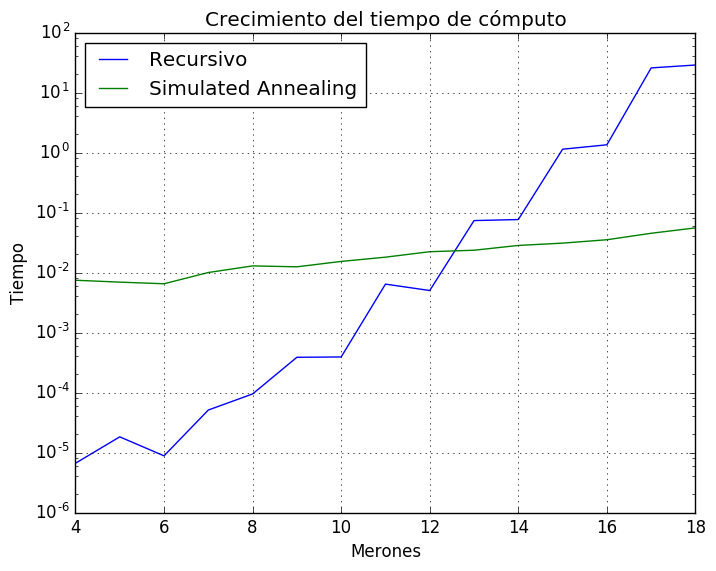

In [109]:
# @time cronometros2(4,18, 10, 100)

## Simulación con medida

In [246]:
σ = [SVector(1.0, 0.0, 0.0) for i in 1:12, j in 1:12]
δ = 2π/3
pasos = 100
Meron.evol_multi_constrained!(σ, pasos, δ)

(0.018541666666666665,0.4027819923151149)

In [248]:
@time Meron.distancia_absoluta_mm!(σ, pasos, δ)

No hay suficientes elementos con carga Q = 1.0
No hay suficientes elementos con carga Q = 1.0
No hay suficientes elementos con carga Q = 1.0
No hay suficientes elementos con carga Q = 1.0
No hay suficientes elementos con carga Q = 1.0
  3.031154 seconds (29.98 M allocations: 4.430 GB, 30.72% gc time)


Dict{Float64,Tuple{Float64,Float64,Float64,Float64,Float64,Float64}} with 2 entries:
  0.5 => (276.0,1.94599,0.0676954,268.0,2.00975,0.0661928)
  1.0 => (1.0,3.60555,NaN,0.0,NaN,NaN)

In [249]:
@time Meron.distancia_annealing_mm!(σ, pasos, δ)

No hay suficientes elementos con carga Q = 1.0
  0.327043 seconds (454.51 k allocations: 46.627 MB, 2.86% gc time)


Dict{Float64,Tuple{Float64,Float64,Float64,Float64,Float64,Float64}} with 1 entry:
  0.5 => (243.0,1.95816,0.0687867,236.0,1.97361,0.0688302)

In [250]:
@time Meron.distancia_absoluta_ma!(σ, pasos, δ)

  8.992548 seconds (51.39 M allocations: 8.420 GB, 18.59% gc time)


Dict{Float64,Tuple{Float64,Float64,Float64}} with 2 entries:
  0.5 => (461.0,1.89778,0.0465585)
  1.0 => (1.0,5.83095,NaN)

In [251]:
@time Meron.distancia_annealing_ma!(σ, pasos, δ)

Configuración sin parejas.
Configuración sin parejas.
  4.942611 seconds (20.21 M allocations: 3.603 GB, 10.22% gc time)


Dict{Float64,Tuple{Float64,Float64,Float64}} with 2 entries:
  0.5 => (404.0,1.81915,0.0462353)
  1.0 => (7.0,1.80718,0.559307)

In [253]:
σ = [SVector(1.0, 0.0, 0.0) for i in 1:15, j in 1:15]
δ = 2π/3
pasos = 100
@time Meron.evol_multi_constrained!(σ, pasos, δ)

  0.266130 seconds (35.78 k allocations: 4.233 MB)


(0.018977777777777777,0.5511887978806272)

In [ ]:
@time Meron.distancia_annealing!(σ, pasos, δ)